### 문제정의
- 붓꽃 꽃잎의 길이, 너비, 꽃받침의 길이, 너피 특징을 활용하여 품종 3가지 분류
- KNN모델의 이웃 숫자 조절(하이퍼 파라미터 튜닝, K 조절)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# KNN 모델
from sklearn.neighbors import KNeighborsClassifier
# 정확도 측정 도구
from sklearn.metrics import accuracy_score

### 데이터 수집

In [5]:
from sklearn.datasets import load_iris # iris 데이터 가져오기
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
# keys() : 키값 확인하기
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
iris_data.data.shape

(150, 4)

In [8]:
iris_data.target.shape

(150,)

In [9]:
# 특성 이름, 순서도 확인 가능
iris_data.feature_names
iris_data['feature_names']

# 'sepal length (cm)' : 꽃받침의 길이
# 'sepal width (cm)' : 꽃밫침의 너비
# 'petal length (cm)' : 꽃잎의 길이
# 'petal width (cm)' : 꽃잎의 너비

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
# 정답 데이터 살펴보기
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# 정답 데이터 이름 살펴보기
iris_data.target_names

# setosa - 0
# versicolor - 1
# virginica - 2

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 데이터 전처리

In [20]:
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [21]:
# 문제와 답으로 분리
X = iris_df
y = iris_data.target

In [22]:
# 훈련 데이터와 평가 데이터셋 분리
# train_test_split
from sklearn.model_selection import train_test_split

In [25]:
# 문제, 답, 비율, 랜덤고정키값
# test.size = 0.3 => 30%만큼 평가 데이터로 분리
# random_state => 랜덤하게 섞이는 규칙을 고정
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state=75)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
46,5.1,3.8,1.6,0.2
22,4.6,3.6,1.0,0.2
86,6.7,3.1,4.7,1.5
66,5.6,3.0,4.5,1.5
149,5.9,3.0,5.1,1.8
...,...,...,...,...
34,4.9,3.1,1.5,0.2
26,5.0,3.4,1.6,0.4
136,6.3,3.4,5.6,2.4
19,5.1,3.8,1.5,0.3


In [26]:
# 분리된 데이터 클래스(정답)별 개수 확인하기
# 7.5 : 2.5
import numpy as np
np.bincount(y_train)
# 데이터가 다양성과 형평성을 유지해야함 -> 학습에 도움됨

array([38, 36, 38], dtype=int64)

### 탐색적 데이터 분석(EDA)

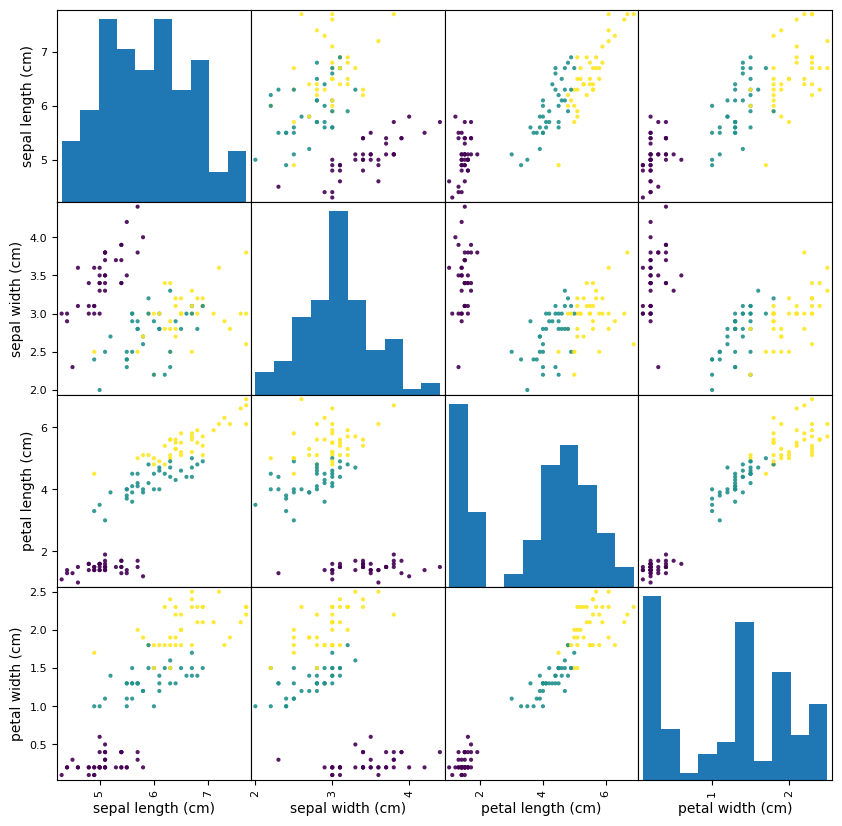

In [28]:
# 품종을 잘 분류해주는 기준은 어떤 컬럼인지
# 산점도 행렬 그래프
pd.plotting.scatter_matrix(X_train, 
                           figsize=(10,10), #
                            c= y_train, # color
                           alpha = 0.9)
plt.show()

### 모델 선택 및 학습

In [32]:
# 객체 생성
iris_knn_model = KNeighborsClassifier(n_neighbors=5)

In [33]:
# fit(훈련문제, 훈련정답) 
iris_knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [34]:
# predict(테스트 문제)
pre = iris_knn_model.predict(X_test)

C:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [35]:
# 정확도 계산 - accuaracy_score
accuracy_score(pre,y_test)

0.9736842105263158

### 하이퍼 파라미너 튜닝
- k값 범위 : 1 ~ 70
- train, test 정확도값

In [49]:
train_acc_lst = []
test_acc_lst = []

for i in range(1,71):
    # 모델 생성 = 하이퍼 파라미터 지정
    knn_clf = KNeighborsClassifier(n_neighbors = i)
    knn_clf.fit(X_train,y_train)
    
    # train 정확도 저장
    train_pre = knn_clf.predict(X_train)
    train_score = accuracy_score(train_pre,y_train)
    train_acc_lst.append(train_score)
    
    # test 정확도 저장
    test_pre = knn_clf.predict(X_test)
    test_score = accuracy_score(test_pre,y_test)
    test_acc_lst.append(test_score)
    
  

C:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

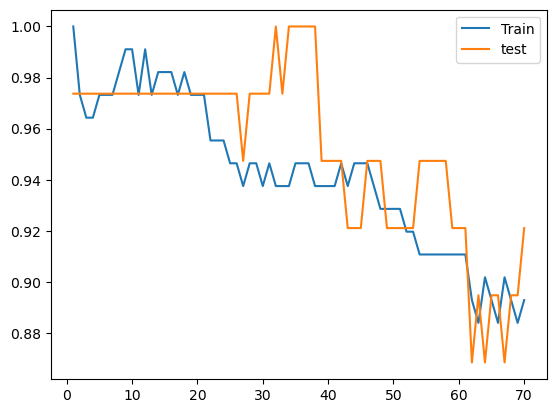

In [53]:
plt.plot(range(1,71),train_acc_lst,label='Train')
plt.plot(range(1,71),test_acc_lst,label='test')
plt.legend()
plt.show()

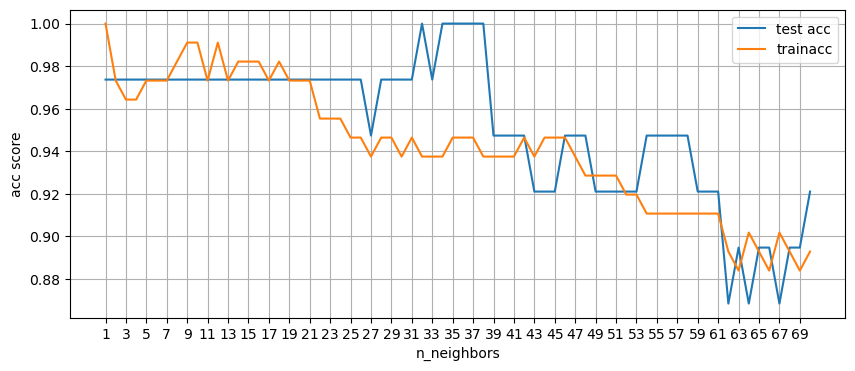

In [54]:
# 선그래프
plt.figure(figsize=(10,4))
plt.plot(range(1,71), test_acc_lst, label ='test acc')
plt.plot(range(1,71), train_acc_lst, label ='trainacc')
plt.grid()
plt.xticks(range(1,71,2))
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('acc score')
           
plt.show()